# Digit recognizer

* This project takes the training dataset which displays the pixels of pictures in a matrix with 784 dimensions and groups the numbers to recognize them using some dimensionality reduction techniques.
* The dataset consists of 42000 datapoints with 784 dimensions.

# Loading the relevant libraries and dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')#read the csv file and store in the variable data
l = data['label']# store the variable column 'label' in l

data = data.drop('label',axis=1)#update the data by dropping the label column

print(data.head())#print the first 5 rows to check the data

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [11]:
print(data.shape)#prints the shape of data to see if the data is correctly uploaded
print(l.shape)#prints the shape of labe to see if the data is correctly updated

(42000, 784)
(42000,)


The data is 42000 X 784 dimensions which implies that the data has 42000 rows and 784 columnswhere as the label column is 42000 X 1 dimensions, which implies that the 'l' variable has 42000 rows and 1 column

# Display the image of the number in the row specified

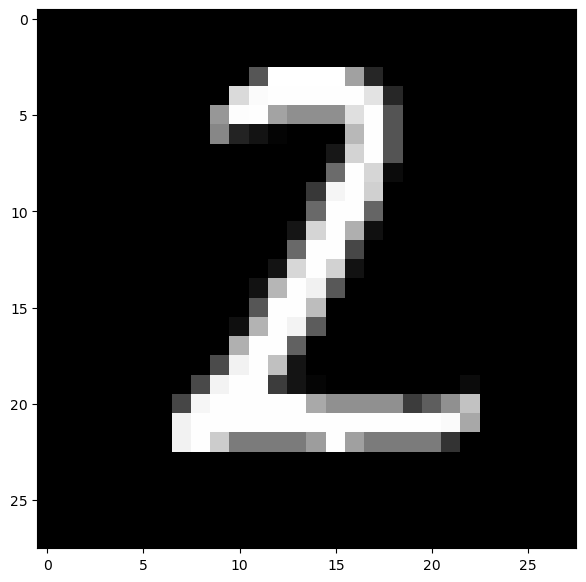

2


In [12]:
plt.figure(figsize=(7,7))
idx = 1400 #row of the label column to display 

grid_data = data.iloc[idx].values.reshape(28,28)#setting the size of the grid to 28 X 28 
plt.imshow(grid_data, interpolation = 'none', cmap='gray')#plotting the data with the conditions specified
plt.show() # show the plot

print(l[idx])#print the number displayed in the row of that label

#if you change the idx value, the number dispalyed changes according to that row

# Visualization using PCA

* Trying to visualize the data using PCA as dimensionality reduction technique.

In [13]:
from sklearn.preprocessing import StandardScaler #importing the required libraries
standardized_data = StandardScaler().fit_transform(data)#performing column standarization and storing into a variable
print(standardized_data.shape)#printing the shape of the matrix to understand if the dimensions come out correctly

(42000, 784)


In [14]:
sample_data = standardized_data#storing the standarized data into a different variable for simplicity

covar_matrix = np.matmul(sample_data.T, sample_data)#computing the co-variance matrix of the sample data using the formula:
# co-variance matrix = X(Transpose).X
print("Covariance matrix shape:",covar_matrix.shape)#printing the shape of the co-variance matrix

Covariance matrix shape: (784, 784)


**Taking the top two eigen values and vectors**: As we want to convert the 784 dimensions data to 2 dimensions, we will take the topp 2 eigen values for dimensionality reduction and projecting onto the 2D space

In [15]:
from scipy.linalg import eigh #the eigh function returns the eigrn values in ascending order

values, vectors = eigh(covar_matrix, eigvals = (782,783))#storing the top two eigen values and vectors of the co-variance matrix
print("Shape of eigen vectors:", vectors.shape)

vectors = vectors.T#converting the eigen vectors into 2D for easiness for further computing
print("Updated shape of the eigen vectors matrix:", vectors.shape)#updated shape of the eigen vectors after the transpose

Shape of eigen vectors: (784, 2)
Updated shape of the eigen vectors matrix: (2, 784)


C:\Users\shrey\AppData\Local\Temp\ipykernel_7516\1388736298.py:3: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix, eigvals = (782,783))#storing the top two eigen values and vectors of the co-variance matrix


* here the vectors[1] represent the eigen vector corresponding 1st principal
* here the vectors[0] represent the eigen vector corresponding 2nd principal

In [17]:
new_coordinates = np.matmul(vectors, sample_data.T)#projecting the sample data onto the 2D plane formed by 2 principal eigen vectors by vector-vector multiplication
print("Resultant new shape of the vectors are",vectors.shape, 'X', sample_data.shape,'=', new_coordinates.shape)#displaying the dimensions of the new coordinates

Resultant new shape of the vectors are (2, 784) X (42000, 784) = (2, 42000)


In [19]:
new_coordinates = np.vstack((new_coordinates,l)).T#vstack is used to stack the datapoints vertically 

#creating a dataframe to plot the points
dataframe= pd.DataFrame(data=new_coordinates, columns=('1st Principal','2nd Principal','Label'))
print(dataframe.head())

   1st Principal  2nd Principal  Label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


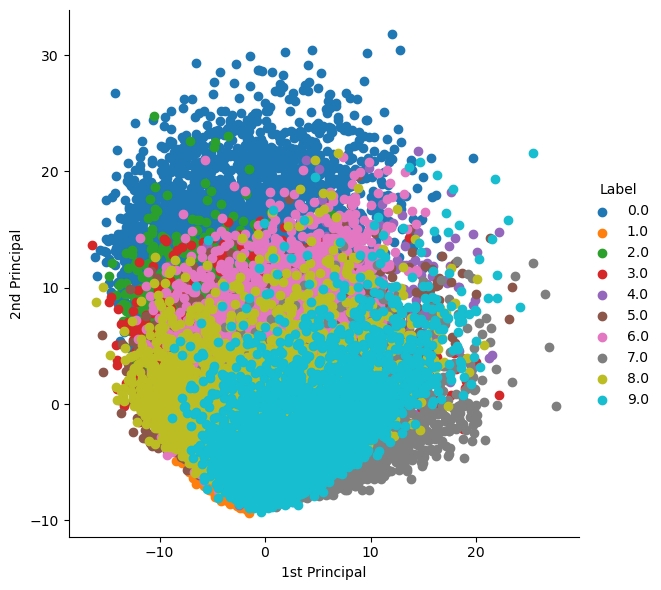

In [22]:
import seaborn as sn
sn.FacetGrid(dataframe, hue='Label', height=6).map(plt.scatter,'1st Principal','2nd Principal').add_legend()
plt.show()

# t-SNE using Sci-kit Learn

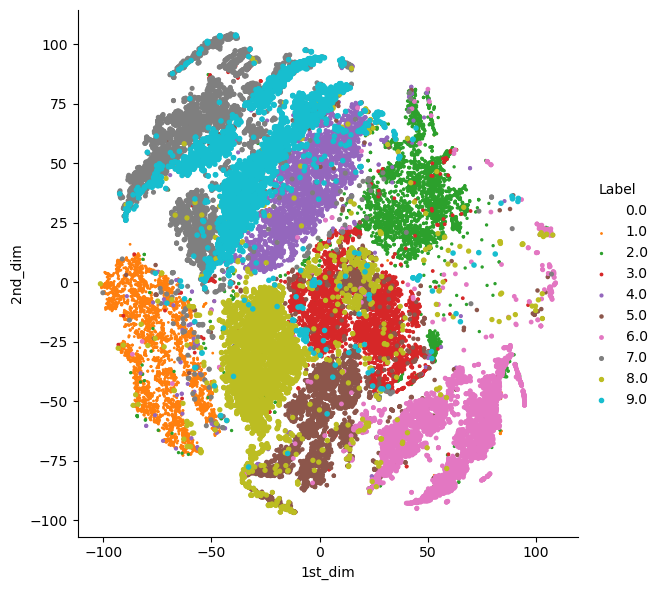

In [26]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)#as we are projecting onto the 2D space, the number of components are 2 and as TSNE is a randomized algotithm, we put random state as 0
tsne_data = model.fit_transform(standardized_data)

#creating a new dataframe to plot the data points on 2D
tsne_data = np.vstack((tsne_data.T,l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('1st_dim', '2nd_dim', 'Label'))

sn.FacetGrid(tsne_df, hue='Label', height=6).map(plt.scatter,'1st_dim','2nd_dim','Label').add_legend()
plt.show()

 * We can conclude this project by saying that for this dataset, t-SNE dimensionality reduction is better to visualize and seperate the datapoints from each other than PCA reduction.